<a href="https://colab.research.google.com/github/TedRees61/MLGeron/blob/main/Avocado%20Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avocado Training Demo
Avocado is a multi-scale deep tensor factorization model that learns a latent representation of the human epigenome. It does so by modeling epigenomics experiments, such as those contained within the Roadmap compendium, as a tensor with three orthogonal axes---epigenomics assays (such as ChIP-seq, DNase-seq, etc), human cell types, and genomic coordinates. The model then decomposes the tensor such that each component has its own set of latent factors. These factors are jointly trained with a neural network model that combines the factors in a non-linear manner on the task of predicting epigenomic signal from the latent factors. When training is complete, one can either use latent factors and the neural network to impute epigenomic experiments that have not yet been performed, or use the learned latent factors by themselves for downstream genomics analyses in the place of epigenomic data itself. The following schematic describes the model.

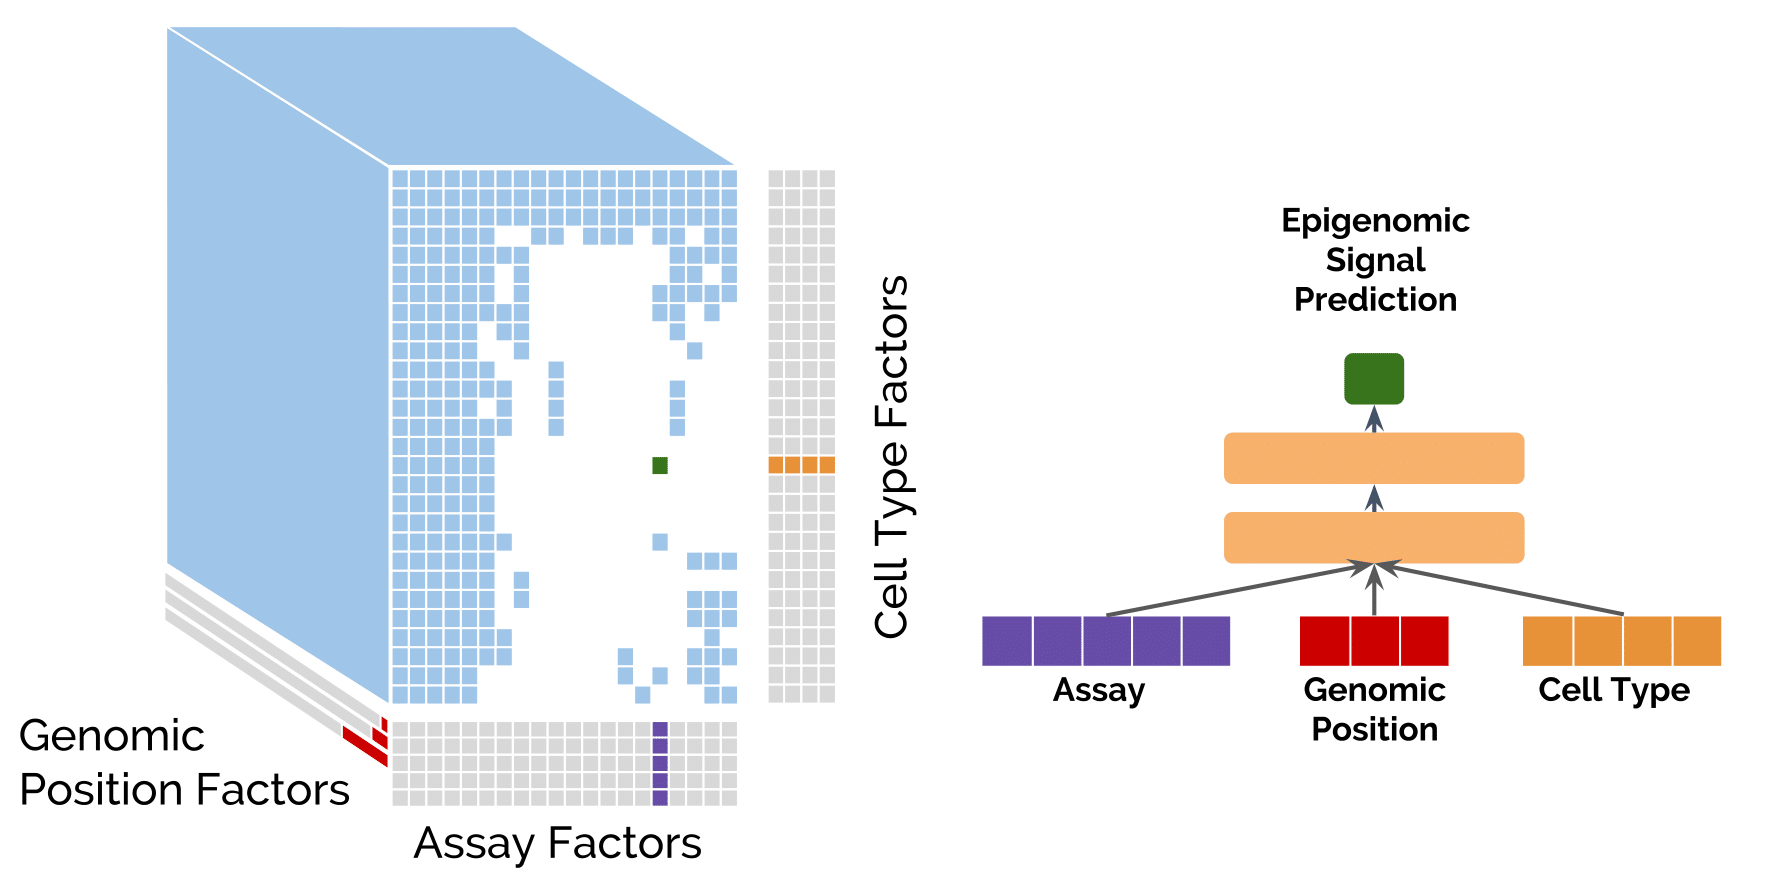

This tutorial will demonstrate how someone can use the provided Avocado code-base in order to train their own models on their own sets of data. The full Avocado model utilized a cluster of GPUs for many hours to perform training, and so we will focus on a scaled-down version of the model restricted to the ENCODE Pilot Regions. Should a user be running this tutorial on a machine that has a GPU, uncomment the following lines in order to enable GPU acceleration. By default it will use the first cuda enabled device, but by changing the number after cuda one can specify any GPU.

In [1]:
#import os, sys   
#os.environ['THEANO_FLAGS'] = "device=cuda0" 

Before beginning, let's output the package versions and computer specifics that this tutorial was run with.

In [3]:

#%load_ext watermark
#%watermark -n -m -p numpy,pandas,keras,theano,sklearn,joblib,tqdm,xgboost,matplotlib,seaborn

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import itertools
import numpy; numpy.random.seed(0)

In [9]:
#print("matplotlib version:", plt.__version__)
print("numpy version:", numpy.__version__)
print("seaborn version:", seaborn.__version__)
#print("itertools version:", itertools.__version__)
!python -V

numpy version: 1.21.6
seaborn version: 0.11.2
Python 3.7.13


In [12]:
#first time only
!pip install avocado-epigenome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 2.8 MB 11.0 MB/s 
  Created wheel for pyBigWig: filename=pyBigWig-0.3.18-cp37-cp37m-linux_x86_64.whl size=197604 sha256=bd259ff2d609a129d10abd1d6d25c03b70583ead685f79e89575d52ee4f382b2
  Stored in directory: /root/.cache/pip/wheels/28/eb/46/c761563ba38bd516bcc6accde3d4188cd84eec067f9201cbec
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=e47f73a83c7d35e1201d55c617e938d1b5a356bdcd40547cbf9d5b5584a508d3
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built pyBigWig theano
